<a href="https://colab.research.google.com/github/gdharanidharan/Handwritten-digits-classification-using-neural-network/blob/main/Handwritten_digits_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train) # 60000 images

60000

In [ ]:
len(X_test) # 10000 images

10000

In [ ]:
X_train.shape # 28x28 image

(60000, 28, 28)

    6000 - No of samples we have

    28 - Each individual image shape (Row or length)

    28 - Each individual image shape (Col or width

Lets see the shape of first image only

(28, 28)
784


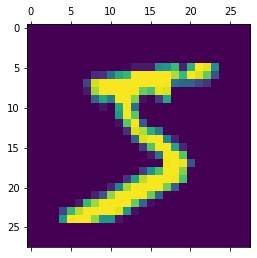

In [ ]:
print(X_train[0].shape)
print(X_train[0].size)
plt.matshow(X_train[0]);

In [ ]:
X_train[0] # matrix of the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

    1. All the values are ranging between 0-255 - we want this range to be between 0-1
    2. It is in 2d array (28,28) -  we want to convert to 1 day array to feed into the model

In [ ]:
# Rescaling
X_train = X_train / 255
X_test = X_test / 255

    we know the images are in form of 2d array we need to convert this into 1d array means 
    we have to flatten it

    X_train.shape - (60000, 28, 28) - we need to reshape this to (60000, 784)

    60000 represents sample size

In [ ]:
X_train[0].ndim

2

In [ ]:
# lets reshape all the images to 1d, we need to bring to this format (60000, 784)

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
print(X_train_flattened)
print(X_train_flattened.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)


In [ ]:
print(X_test_flattened)
print(X_test_flattened.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)


In [ ]:
# lets compare both matrix 

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(X_train_flattened[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# lets see the shape of both matrix

print(X_train[0].shape) #2d
print(X_train_flattened[0].shape) #1d

(28, 28)
(784,)


In [ ]:
# lets see the dim of both matrix

print(X_train[0].ndim)
print(X_train_flattened[0].ndim)

2
1


In [ ]:
# lets see how the y_train look lik

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

It is the labels [0,1,2,3,4,5,6,7,8,9]

    We need to create this kind of neural network where we have 6000 samples and each image is 28*28 grid and we already converted to 1d array (784,) 
    and rescaled it between (0-1)

      1. we need to use 784 neurons in input layer
      2. 10 output neuron as we havce 10 labels and sigmoid activation function
      3. The nueron which have the highest value will be our class 

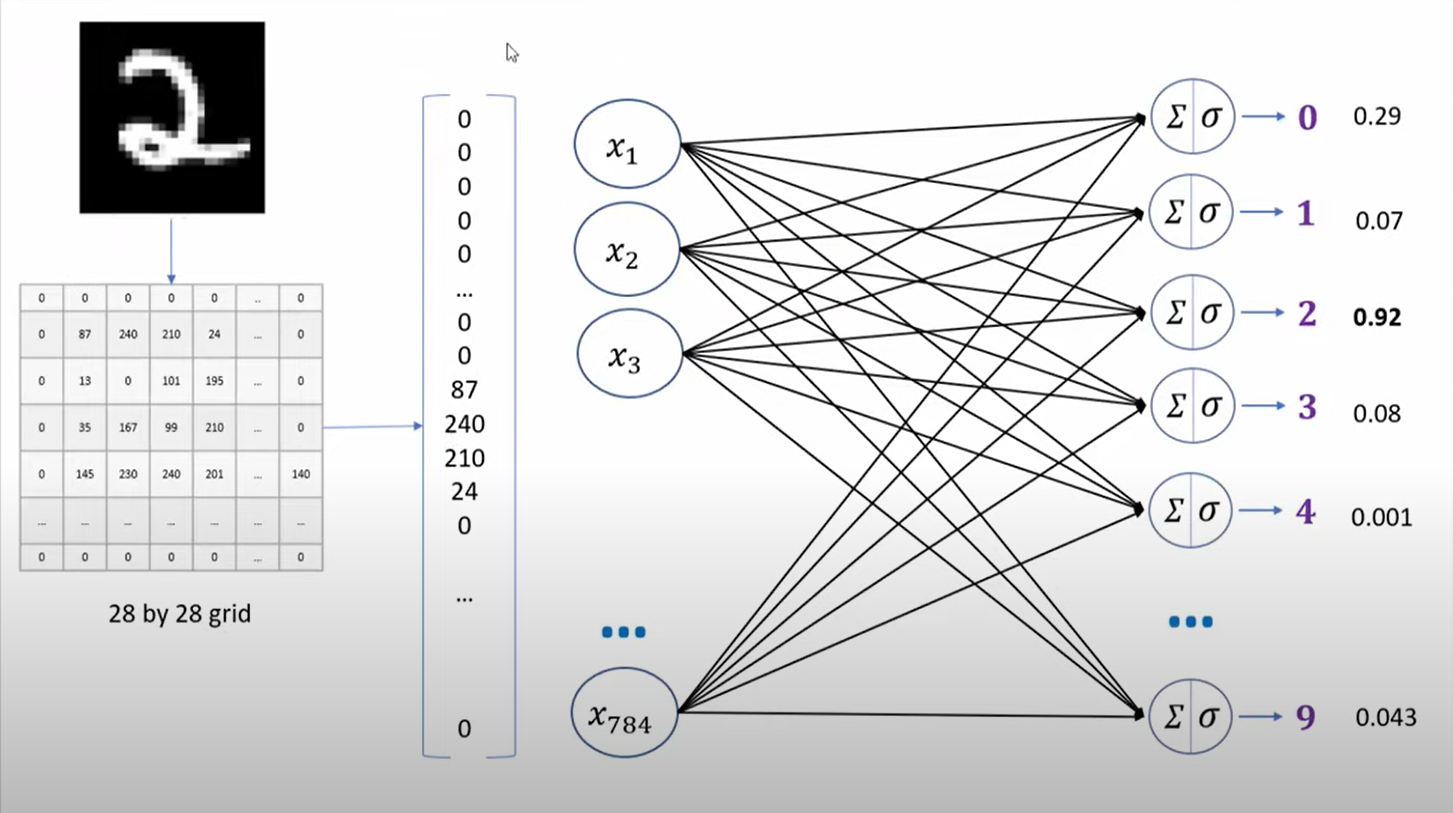

In [ ]:
# lets build out simple nueral network

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9250



#### First step
    model = keras.Sequential([
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])

1. 10 is the output neurons, (784,) is the input share which is 1d(flattened), sigmoid is our activation function. 
2. we have created out simple neural network with input, output layer with no hidden layer(s)

#### Second step
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

1. adam optimizer, for optimize the weights during backward propogation
2. sparse_categorical_crossentropy loss function to calcualte the loss between actual and predicted
3. metrics choose is accuracy             

#### Third step
    model.fit(X_train_flattened, y_train, epochs=5)

1. FIt the model using our flattened x train data and y train
2. Epochs is number of iteration we need. one forward and one backward propogation is one epoch

In [ ]:
# evaluate the model

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9251


[0.27039122581481934, 0.9251000285148621]

we got 92.3% accuracy for the model without hidden layers

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[2.6549971e-02, 2.2473175e-07, 3.5459492e-02, ..., 9.9982893e-01,
        7.4807324e-02, 4.8731142e-01],
       [5.0842828e-01, 3.5029307e-03, 9.9959344e-01, ..., 2.9074423e-12,
        1.1734664e-01, 2.1642688e-09],
       [4.3354550e-04, 9.9208575e-01, 6.3078684e-01, ..., 1.4168870e-01,
        4.2413095e-01, 4.6885692e-02],
       ...,
       [5.3117792e-06, 2.6439720e-06, 8.3942915e-04, ..., 2.6240784e-01,
        5.0881672e-01, 6.9984901e-01],
       [1.7495074e-04, 1.1602950e-04, 1.8928791e-04, ..., 5.9893242e-05,
        5.9211558e-01, 7.8630954e-05],
       [1.3523551e-02, 2.8114375e-10, 1.5525477e-01, ..., 5.3947709e-08,
        1.2038578e-04, 2.9190423e-07]], dtype=float32)

In [ ]:
# lets see the first prediction
y_predicted[0]

array([2.6549971e-02, 2.2473175e-07, 3.5459492e-02, 9.5242751e-01,
       2.0368700e-03, 1.0383805e-01, 1.3895259e-06, 9.9982893e-01,
       7.4807324e-02, 4.8731142e-01], dtype=float32)

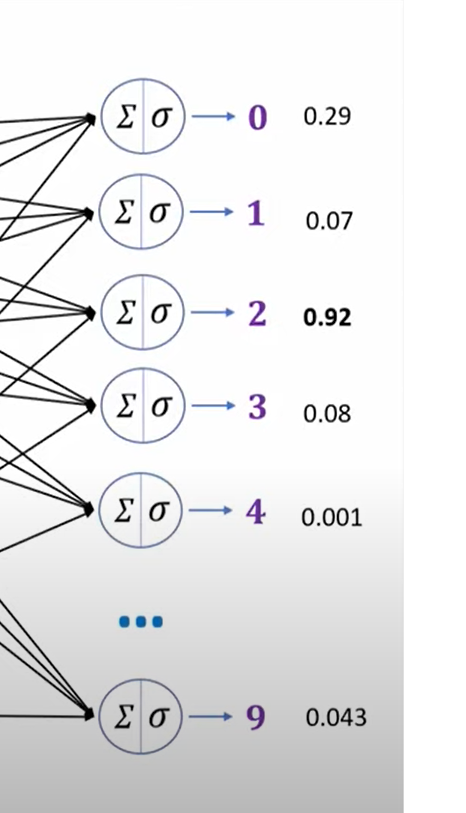

    array([2.4527879e-02, 2.7106529e-07, 3.8538374e-02, 9.3549836e-01,
       1.6271353e-03, 7.6970488e-02, 9.1214673e-07, 9.9953806e-01,
       8.1070818e-02, 6.5410823e-01], dtype=float32)

1. These are the predicted values for first record which are the outputs of the output layer which has sigmoid activation function
2. The maximum score will be our class

[2.6549971e-02 2.2473175e-07 3.5459492e-02 9.5242751e-01 2.0368700e-03
 1.0383805e-01 1.3895259e-06 9.9982893e-01 7.4807324e-02 4.8731142e-01]


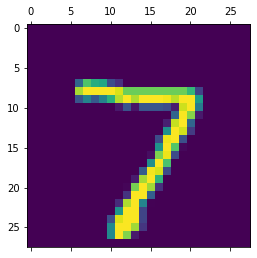

In [ ]:
print(y_predicted[0])
plt.matshow(X_test[0]);

In [ ]:
# np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

See the image prediction is correct

In [ ]:
# lets see the actual label of it
print(y_test[0])

7


In [ ]:
# lets get the predicted labels of all records

y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# lets cross check top 5 predictions

print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [ ]:
# lets see the actual of top 5

print(y_test[:5])

[7 2 1 0 4]


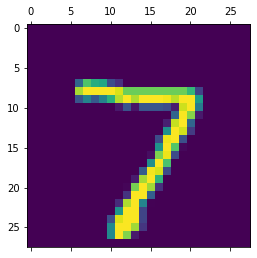

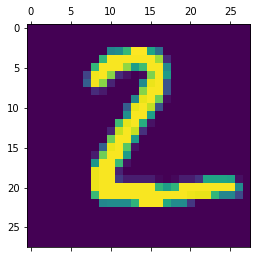

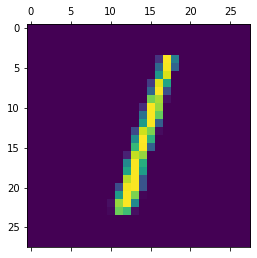

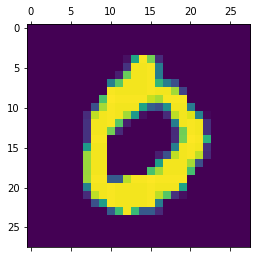

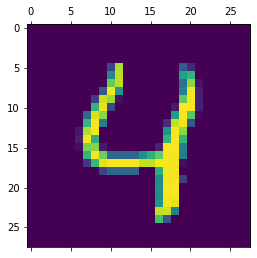

In [ ]:
# lets see the image of top 5

for i in range(0,5):
  plt.matshow(X_test[i]);

In [ ]:
# lets build confusion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 965    0    1    1    0    5    4    3    1    0]
 [   0 1108    3    2    0    1    4    2   15    0]
 [   8    8  919   20    8    4   12   12   39    2]
 [   3    0   17  929    0   19    2   12   23    5]
 [   1    1    5    2  913    0   10    6   10   34]
 [   9    1    2   45    6  772   15    6   29    7]
 [  11    3    5    1    7    9  917    2    3    0]
 [   1    5   20    7    4    0    0  966    4   21]
 [  10    6    6   28    9   25   10   13  862    5]
 [  11    7    1   11   25    7    0   39    8  900]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

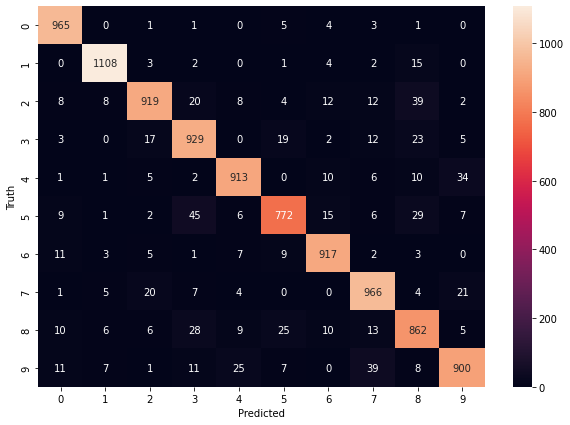

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0681 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9835


## First step

    model = keras.Sequential([
        keras.layers.Dense(100, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

# lets see what does this mean

    keras.layers.Dense(100, input_shape=(784,), activation='relu')

100 is the hidden layers neurons, (784,) is the input share which is 1d(flattened), sigmoid is our activation function.
This creates input layer with 784 neurons and one hidden layer with 100 neurons with relu activation function

    keras.layers.Dense(10, activation='sigmoid'
creates output layer with 10 neurons and sigmoid activation function

## Second step
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

adam optimizer, for optimize the weights during backward propogation
sparse_categorical_crossentropy loss function to calcualte the loss between actual and predicted
metrics choose is accuracy

##Third step
    model.fit(X_train_flattened, y_train, epochs=5)

FIt the model using our flattened x train data and y train
Epochs is number of iteration we need. one forward and one backward propogation is one epoch

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9766


[0.07868162542581558, 0.9765999913215637]

Text(69.0, 0.5, 'Truth')

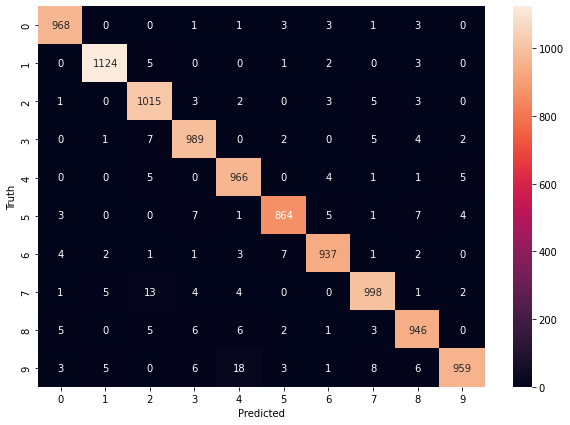

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2718 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

    model.fit(X_train, y_train, epochs=10)

Here we have not used X_train_flattened instead used X_test as we have created a flatten layer given by tensor flow: Refer below

    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9771


[0.08859666436910629, 0.9771000146865845]

Text(69.0, 0.5, 'Truth')

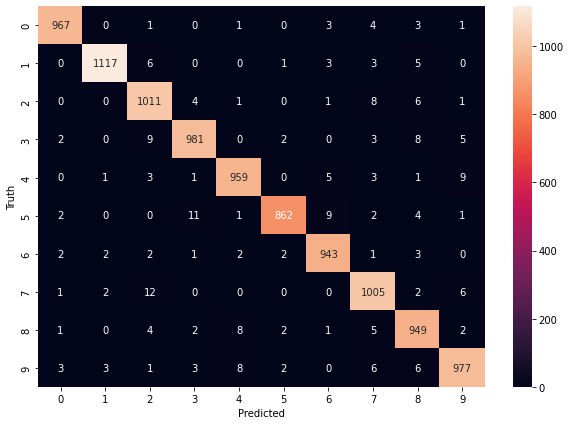

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')